# 1. 문제 정의
### 분석 목표
- 검진데이터에서 다른 변수들을 사용해 요단백 이상과 정상 분류


# 2. 도메인에 대한 이해

- 개요: 소변에 단백질이 나오는 것을 단백뇨라고 합니다. 정상적으로 150 mg 미만의 단백질은 소변에서 검출될 수 있습니다. 하지만 성인에서 하루에 소변으로 배설되는 총 단백질의 양이 150 mg 이상일 경우, 임상적으로 유의미한 단백뇨라고 합니다. 특히 하루에 배설되는 단백질량이 3.5 g/m2 이상으로 많은 경우도 있는데 이를 신증후군이라고 합니다. 단백뇨는 콩팥병을 진단하는 중요한 지표 중의 하나이며 여러 가지 임상적인 문제와 연관될 수 있어 정확한 진단과 관리가 필요합니다.

- 원인:
1. 사구체성 단백뇨 (Glomerular proteinuria)

콩팥에는 혈액의 노폐물을 거르는 장치인 사구체 여과막이 있습니다. 사구체 여과막은 정상적으로 노페물만 통과해야 하는데, 여과막에 이상이 생겨 단백질도 소변으로 새어 나오면 단백뇨가 됩니다. 사구체성 단백뇨의 원인으로는 신증후군 , IgA 신장병증, 루푸스신염, 당뇨병신병증 등이 있습니다.


2. 요세관성 단백뇨 (Tubular proteinuria)

크기가 아주 작은 단백질은 사구체 여과막을 통과하여 여과되더라도, 요세관에서는 대부분 흡수됩니다. 하지만, 요세관에 이상이 생겨 흡수되어야 할 단백질이 흡수되지 못하고, 소변으로 배설되면 '요세관성 단백뇨'라고 합니다.


3. 과다유출 단백뇨 (Overflow proteinuria)

콩팥의 사구체나 요세관의 문제는 없으나, 비정상적으로 단백질이 체내에서 과다 생성되어 소변으로 유출되어 나오는 단백뇨를 '과다유출 단백뇨'라고 합니다. 과다 생성되는 단백질로는 면역글로불린, 미오글로불린, 혈색소 등이 있습니다. 

- 진단을 위한 혈액검사:

먼저, 단백뇨 환자에서 콩팥의 기능이 이미 나빠져 있을 수도 있으므로, 혈액검사를 통해서 콩팥의 기능을 확인합니다. 혈중 요소질소 농도와 혈청 크레아티닌을 통해서 사구체 여과율을 추정하여 콩팥의 기능이 평가합니다. 그리고, 단백뇨의 원인 질환을 감별하기 위한 혈액검사를 시행합니다. 혈당 검사를 비롯한 당뇨병 검사, 자가면역질환을 감별하기 위한 항체검사, 이상단백 과다 생성을 감별하기 위한 단백 전기영동검사 등 환자의 병력과 증상에 따라 다양한 검사를 시행할 수 있습니다.

단백뇨의 원인은 여러가지이지만, 콩팥(신장)과 관련된 질병일 확률이 높음

-> 혈색소와 혈청크레아티닌을 통해 콩팥의 상태 평가할 수 있음

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rc('font', family='Malgun Gothic') # For Windows
%matplotlib inline
import warnings
from scipy import stats
from math import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from imblearn.under_sampling import TomekLinks
warnings.filterwarnings('ignore')

In [161]:
df = pd.read_csv('국민건강보험공단_건강검진정보_20211229.CSV', encoding = 'cp949')


In [162]:
df.loc[df['LDL 콜레스테롤'].isnull(), 'LDL 콜레스테롤'] = df.loc[df['LDL 콜레스테롤'].isnull(), '총 콜레스테롤'] - df.loc[df['LDL 콜레스테롤'].isnull(), 'HDL 콜레스테롤'] - df.loc[df['LDL 콜레스테롤'].isnull(), '트리글리세라이드']
# df.loc[df['HDL 콜레스테롤'].isnull(), 'HDL 콜레스테롤'] = df.loc[df['HDL 콜레스테롤'].isnull(), '총 콜레스테롤'] - df.loc[df['HDL 콜레스테롤'].isnull(), 'LDL 콜레스테롤'] - df.loc[df['HDL 콜레스테롤'].isnull(), '트리글리세라이드']
# df.loc[df['트리글리세라이드'].isnull(), '트리글리세라이드 콜레스테롤'] = df.loc[df['트리글리세라이드'].isnull(), '총 콜레스테롤'] - df.loc[df['트리글리세라이드'].isnull(), 'LDL 콜레스테롤'] - df.loc[df['트리글리세라이드'].isnull(), 'LDL 콜레스테롤']

In [164]:
df0 = df[['성별코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부']]


In [165]:
df0.loc[(df0['요단백'] == 1),'요단백'] = 0
df0.loc[(df0['요단백'] != 0),'요단백'] = 1

# 3. 데이터 확인

## 변수 정의
|데이터이름|	데이터설명|	데이터타입|	비고|
|---------|-------------|----------|----|
|성별코드|	성별에 따른 숫자 부여	|범주형|	1,2|
|연령대코드|	연령대에 따른 숫자 부여|	범주형	|int
|신장(5cm단위)|	내림한 신장의 5cm단위로 할당	|범주형	|cm
|체중(5kg단위)|	내림한 체중의 5kg단위로 할당	|범주형	|kg
|허리둘레|	검진자의 허리둘레	|연속형	|cm
|시력(좌)|수검자의 좌측 눈의 시력|연속형|N
|시력(우)|수검자의 우측 눈의 시력|연속형|N
|청력(좌)|수검자의 좌측 귀의 청력|범주형|int
|청력(우)|수검자의 우측 귀의 청력|범주형|int
|수축기 혈압|	혈압 검사시 검진자의 최고 혈압	|연속형	|mmHg
|이완기 혈압|	혈압 검사시 검진자의 최저 혈압	|연속형	|mmHg
|식전 혈당|	검진자의 식사 전 혈당 수치	|연속형	|㎎/㎗
|총 콜레스테롤|	혈청 중 콜레스테롤의 총 합	|연속형	|int
|혈색소|	혈액 및 혈구 속에 존재하는 색소 단백질	|범주형	|int
|요단백|	소변에 포함된 단백질 정도	|범주형	|int
|혈청크레아틴|	근육의 발육과 운동에 관계된 체내요소	|연속형	|IU/L
|(혈청지오티)AST|	장기 내 효소, 장기 손상시 농도 증가	|연속형	|IU/L
|(혈청지오티)ALT|	장기 내 효소, 장기 손상시 농도 증가	|연속형	|IU/L
|감마지티피|	혈중 효소, 간기능 장애시 증가	|연속형	|IU/L
|흡연상태|	검진자의 흡연 여부	|범주형	|1, 2
|음주여부|	검진자의 음주 여부	|범주형	|1, 2

## 분포 확인

In [166]:
normal = df0[df0['요단백'] == 0].dropna()
abnormal = df0[df0['요단백']!= 0].dropna()

<AxesSubplot: xlabel='요단백', ylabel='count'>

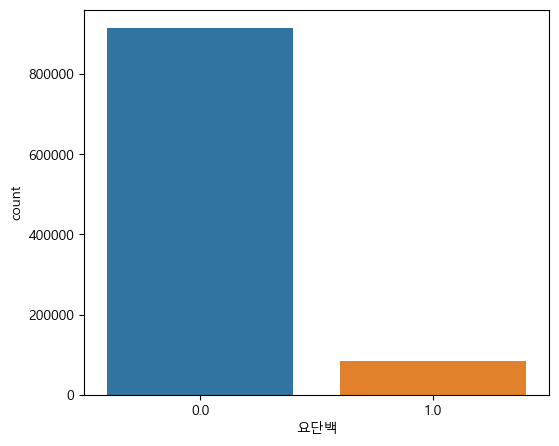

In [167]:
# 비율 확인
plt.figure(figsize = (6,5))
sns.countplot(x = '요단백', data=df0)

In [168]:
print('정상 데이터 수: ',len(normal))
print('비정상 데이터 수: ',len(abnormal))
print('정상 데이터 비율: ', len(normal)*100/(len(normal)+len(abnormal)),'%')
print('비정상 데이터 비율: ', len(abnormal)*100/(len(normal)+len(abnormal)),'%')

정상 데이터 수:  369167
비정상 데이터 수:  32709
정상 데이터 비율:  91.86092227453244 %
비정상 데이터 비율:  8.139077725467557 %


In [169]:
def plot_difference(df):
    for i in range(len(df.columns)):
        plt.figure(figsize = (6,5))
        sns.boxplot(x = '요단백', y = df.columns[i], data = df)
        plt.title('정상그룹 vs 이상그룹 - '+str(df.columns[i]))
        plt.show()

## 통계량 확인

In [170]:
normal.describe().T

,count,mean,std,min,25%,50%,75%,max
성별코드,369167.0,1.516205,0.499738,1.0,1.0,2.0,2.0,2.0
신장(5Cm단위),369167.0,160.620681,9.204010,130.0,155.0,160.0,165.0,195.0
체중(5Kg 단위),369167.0,62.595600,12.204723,30.0,55.0,60.0,70.0,135.0
허리둘레,369167.0,82.092886,9.679965,8.7,75.3,82.0,88.0,999.0
시력(우),369167.0,0.930690,0.656258,0.1,0.7,0.9,1.0,9.9
청력(좌),369167.0,1.047702,0.221009,1.0,1.0,1.0,1.0,3.0
청력(우),369167.0,1.045213,0.215275,1.0,1.0,1.0,1.0,3.0
수축기 혈압,369167.0,124.613492,14.732199,69.0,115.0,124.0,134.0,260.0
이완기 혈압,369167.0,76.521788,9.933960,31.0,70.0,77.0,82.0,178.0
식전혈당(공복혈당),369167.0,103.343389,23.912547,35.0,91.0,98.0,108.0,901.0


In [171]:
abnormal.describe().T

,count,mean,std,min,25%,50%,75%,max
성별코드,32709.0,1.439665,0.496354,1.00,1.0,1.0,2.0,2.0
신장(5Cm단위),32709.0,161.656119,9.213670,130.00,155.0,160.0,170.0,195.0
체중(5Kg 단위),32709.0,64.533767,13.191831,30.00,55.0,65.0,75.0,135.0
허리둘레,32709.0,83.986065,10.760119,48.00,77.0,84.0,90.8,680.0
시력(우),32709.0,0.921193,0.753651,0.10,0.7,0.9,1.0,9.9
청력(좌),32709.0,1.061054,0.249070,1.00,1.0,1.0,1.0,3.0
청력(우),32709.0,1.057752,0.243662,1.00,1.0,1.0,1.0,3.0
수축기 혈압,32709.0,126.907029,16.213804,64.00,116.0,126.0,137.0,260.0
이완기 혈압,32709.0,77.825553,10.863018,33.00,70.0,78.0,84.0,153.0
식전혈당(공복혈당),32709.0,112.622612,36.532777,45.00,92.0,102.0,119.0,567.0


In [172]:
# 정상그룹에 대해 비정상그룹의 통계량 차이(비율)보기
(abnormal.describe().T - normal.describe().T)*100/normal.describe().T

,count,mean,std,min,25%,50%,75%,max
성별코드,-91.139782,-5.048160,-0.677170,0.000000,0.000000,-50.000000,0.000000,0.000000
신장(5Cm단위),-91.139782,0.644648,0.104950,0.000000,0.000000,0.000000,3.030303,0.000000
체중(5Kg 단위),-91.139782,3.096331,8.087914,0.000000,0.000000,8.333333,7.142857,0.000000
허리둘레,-91.139782,2.306143,11.158660,451.724138,2.257636,2.439024,3.181818,-31.931932
시력(우),-91.139782,-1.020465,14.840614,0.000000,0.000000,0.000000,0.000000,0.000000
청력(좌),-91.139782,1.274365,12.696767,0.000000,0.000000,0.000000,0.000000,0.000000
청력(우),-91.139782,1.199669,13.186317,0.000000,0.000000,0.000000,0.000000,0.000000
수축기 혈압,-91.139782,1.840520,10.056915,-7.246377,0.869565,1.612903,2.238806,0.000000
이완기 혈압,-91.139782,1.703782,9.352339,6.451613,0.000000,1.298701,2.439024,-14.044944
식전혈당(공복혈당),-91.139782,8.979019,52.776606,28.571429,1.098901,4.081633,10.185185,-37.069922


## 결측치 처리

In [173]:
df0.dropna(inplace= True)

## 이상치 처리

In [174]:
def drop_anomalies(df):
    # 특별한 이상치 처리(전체 dataset에 적용)

    if '청력(우)' in df.columns:
        idx = df[df['청력(우)'] == 3].index
        df.drop(index = idx, inplace= True)

    if '청력(좌)' in df.columns:
        idx = df[df['청력(좌)'] == 3].index
        df.drop(index = idx, inplace= True)

    if ('시력(우)' in df.columns):
        df.loc[(df['시력(우)'] == 9.9),'시력(우)'] = 0
    
    if '시력(좌)' in df.columns:
        df.loc[(df['시력(좌)'] == 9.9),'시력(좌)'] = 0

    if '허리둘레' in df.columns:
        idx = df[(df['허리둘레'] == 999.0) | (df['허리둘레'] == 680.0)].index
        df.drop(index = idx, inplace= True)

    if '허리둘레' in df.columns:
        idx = df[df['허리둘레'] <= 10.0].index
        df.drop(index = idx, inplace= True)
        
    df = df.reset_index(drop = True)
    return df

def drop_outliers(train, coef):

    # 통계적 이상치 처리(train set에만 적용)

    outlier_list = ['체중(5Kg 단위)', '허리둘레', '시력(좌)',
    '시력(우)','수축기 혈압','이완기 혈압','식전혈당(공복혈당)', '총 콜레스테롤',
    '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '혈청크레아티닌',
    '(혈청지오티)AST','감마 지티피','(혈청지오티)ALT']

    for col in train.columns :
        if col in outlier_list:
            iqr = train[col].quantile(.75)-train[col].quantile(.25)
            u = train[col].quantile(.75) + coef*iqr
            l = train[col].quantile(.25) - coef*iqr
            idx = train[(train[col] > u) | (train[col] < l)].index
            train = train.drop(index = idx)

    train = train.reset_index(drop = True)
    return train

In [175]:
df0 = drop_anomalies(df0)

In [176]:
# df0 = drop_outliers(df0, 1.5)

## 분포 확인

In [177]:
def plot_difference(df):
    for i in range(len(df.columns)):
        plt.figure(figsize = (6,5))
        sns.boxplot(x = '요단백', y = df.columns[i], data = df)
        plt.title('정상그룹 vs 이상그룹 - '+str(df.columns[i]))
        plt.show()

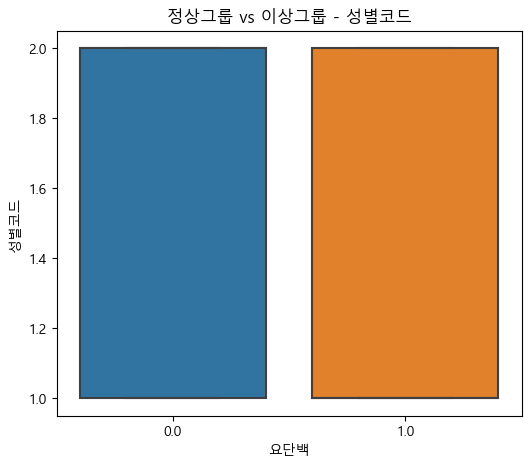

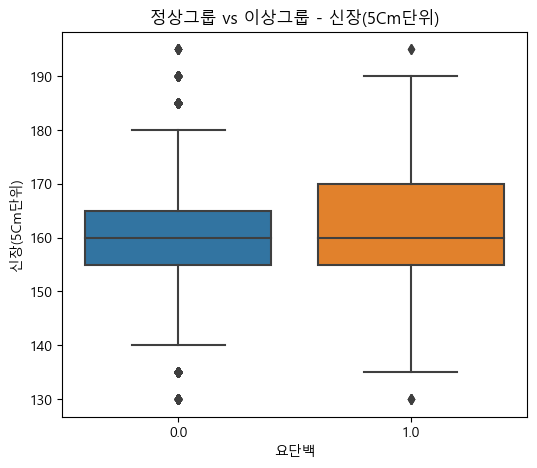

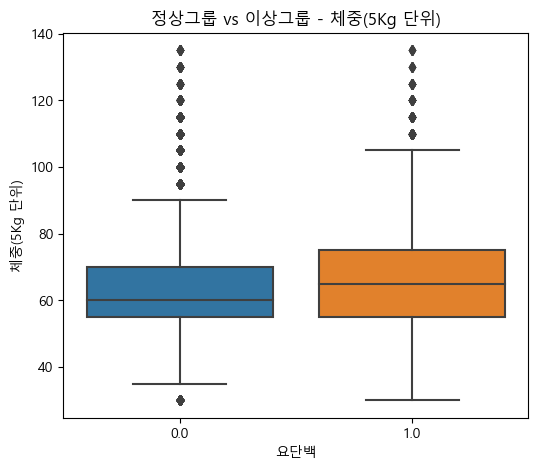

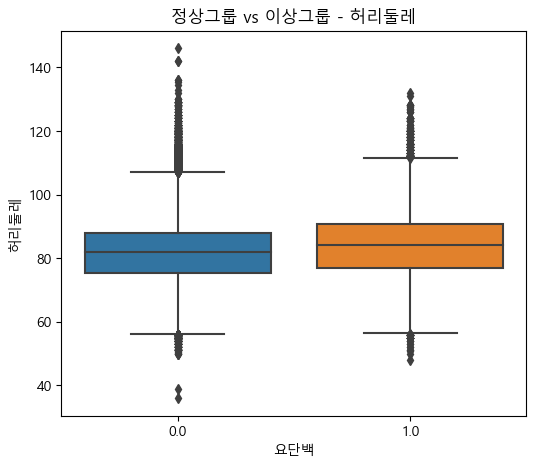

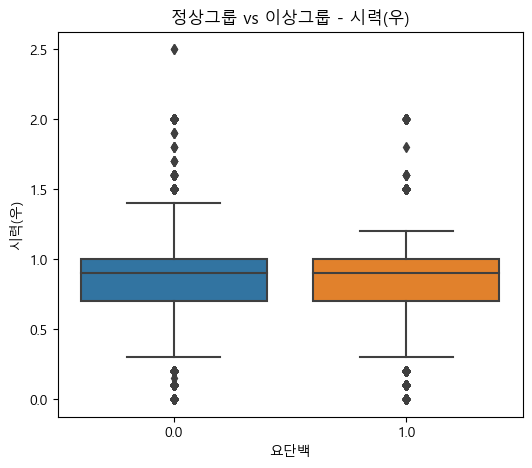

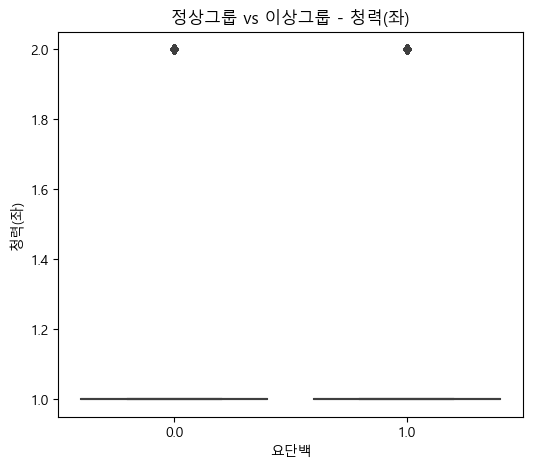

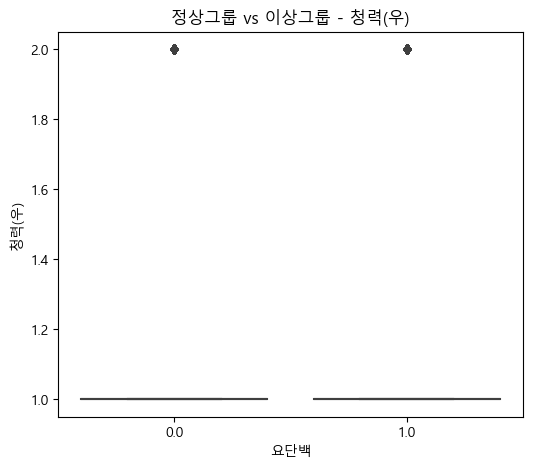

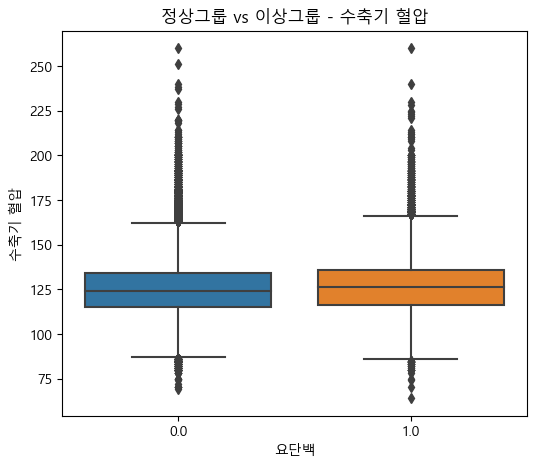

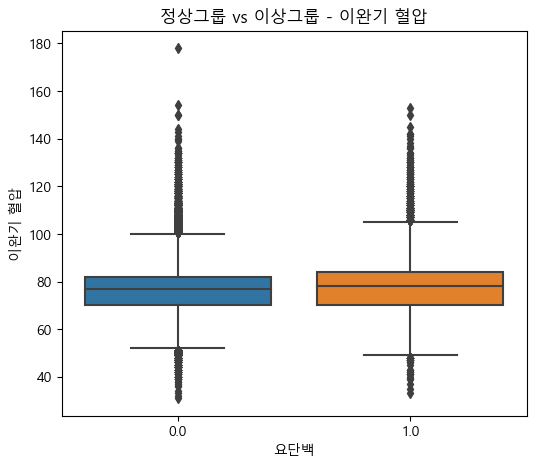

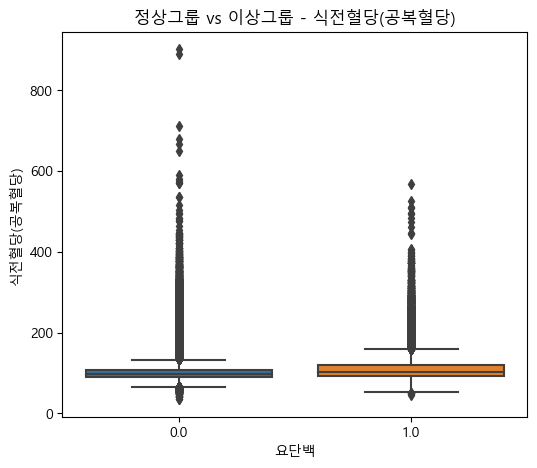

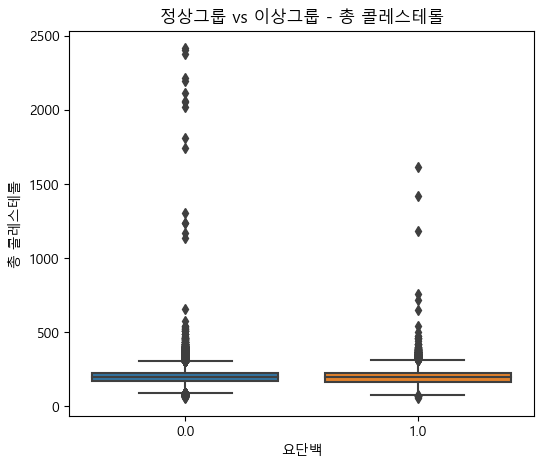

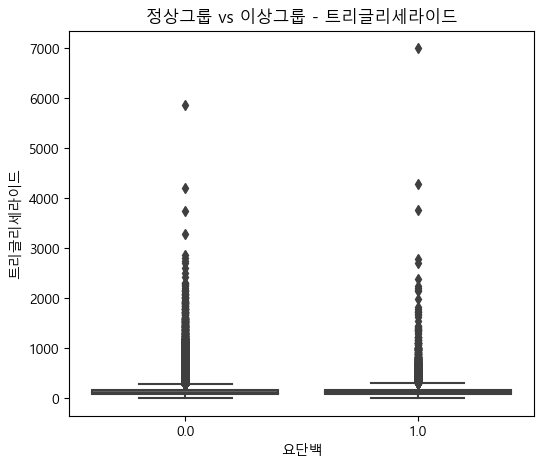

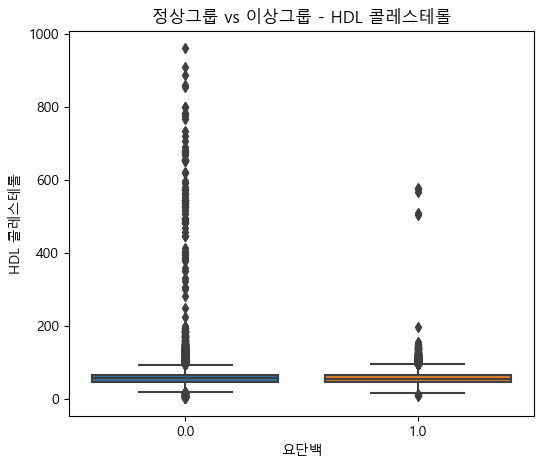

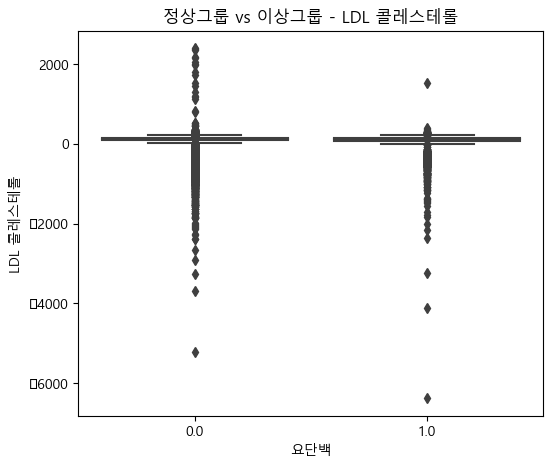

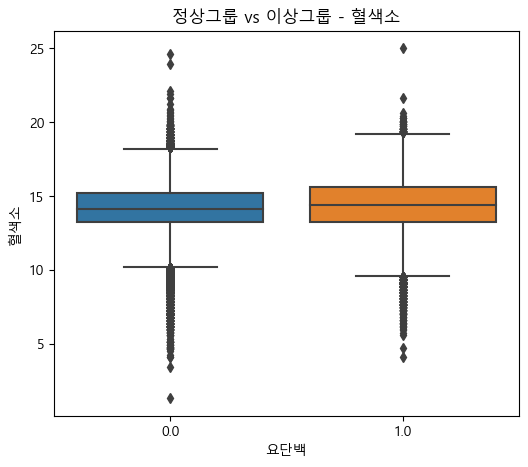

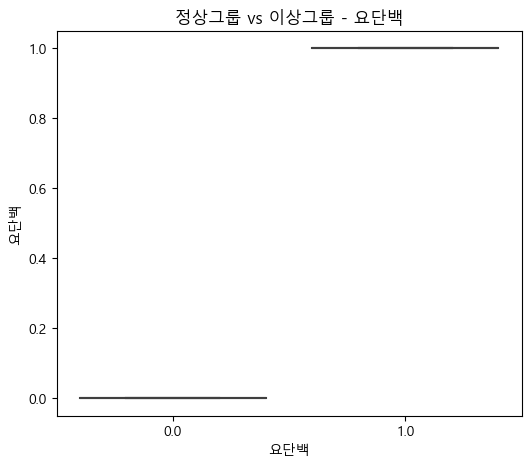

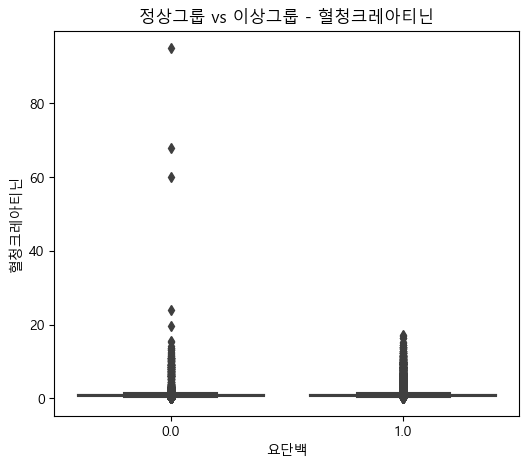

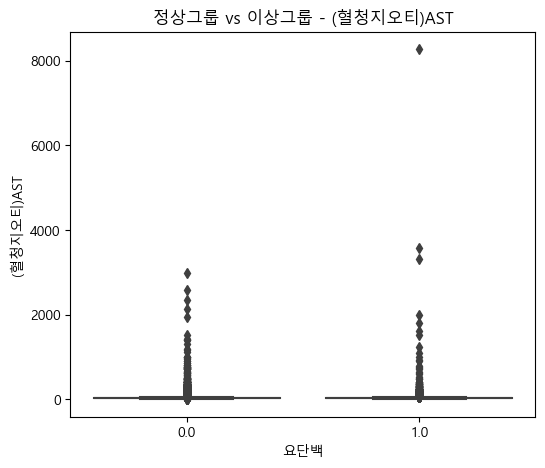

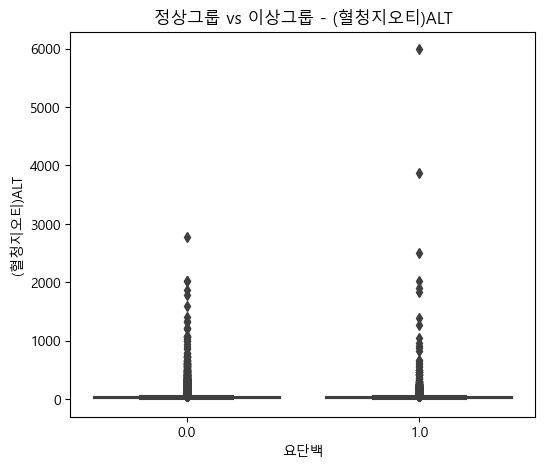

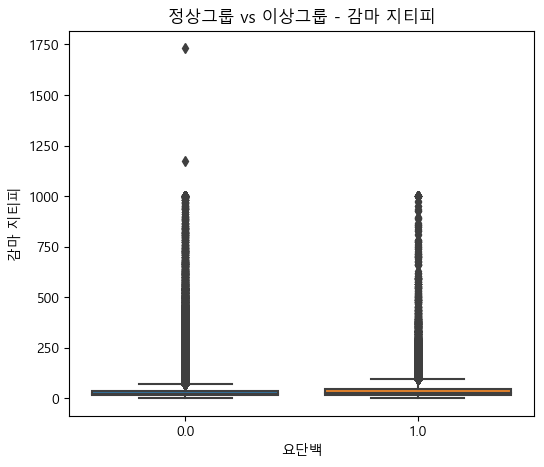

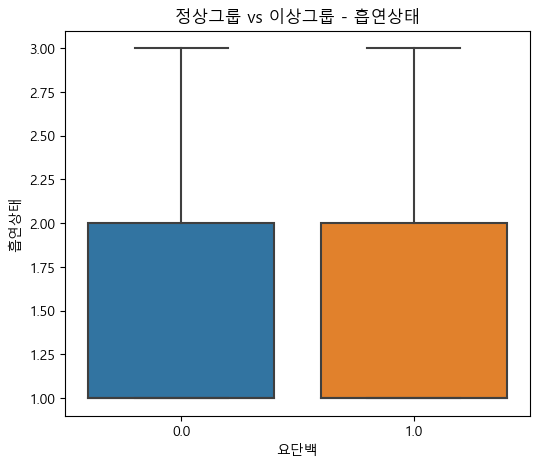

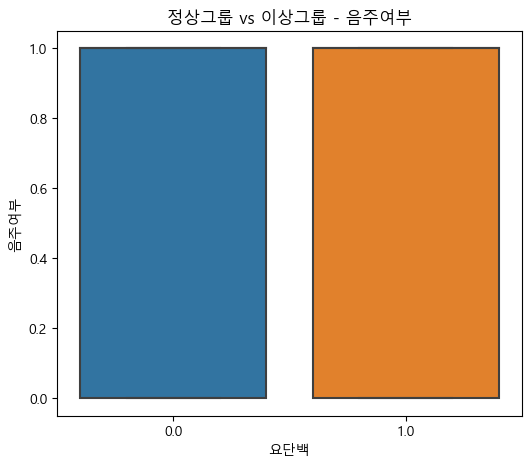

In [178]:
plot_difference(df0)

## 요단백 변수 제어에 따른 정상그룹과 이상그룹간의 평균 차이 검정

In [179]:
# 차이 검정
def mean_difference_test(column):
    # 통계량
    mean_normal = normal[column].mean()
    mean_abnormal = abnormal[column].mean()
    std_normal = normal[column].std()
    std_abnormal = abnormal[column].std()
    df_normal = len(normal.dropna())
    df_abnormal = len(abnormal.dropna())
    # 검정통계량
    z = (mean_normal - mean_abnormal)/sqrt((pow(std_normal,2)/df_normal)+(pow(std_abnormal,2)/df_abnormal))
    # 차이가 있으면 True, 없으면 False 반환
    if abs(z)>1.645:
        print(True)
    else:
        print(False)

In [180]:
def difference_result(df):
    diff_True = []
    diff_False = []
    for col in df.columns:
        t_test = stats.ttest_ind(normal[col],abnormal[col])
        if t_test[1] < 0.05:
            diff_True.append(col)
        else:
            diff_False.append(col)
    print('정상 그룹과 이상 그룹 간 차이가 있는 변수:',diff_True)
    print('\n')
    print('정상 그룹과 이상 그룹 간 차이가 없는 변수:',diff_False)
    return diff_True

In [181]:
difference_result(df0)

정상 그룹과 이상 그룹 간 차이가 있는 변수: ['성별코드', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부']


정상 그룹과 이상 그룹 간 차이가 없는 변수: []


['성별코드',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '허리둘레',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기 혈압',
 '이완기 혈압',
 '식전혈당(공복혈당)',
 '총 콜레스테롤',
 '트리글리세라이드',
 'HDL 콜레스테롤',
 'LDL 콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마 지티피',
 '흡연상태',
 '음주여부']

## 데이터 분할과 스케일링
- train set과 test set 7:3
- 정상 그룹과 이상 그룹 비율 유지
- 스케일링

In [182]:
X = df0.drop(columns = ['요단백'])
y = df0['요단백']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.3,
                                                    shuffle= True,
                                                    random_state= 42
                                                    )

In [184]:
scaler = RobustScaler()
for col in X_train.columns:
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1,1))

In [185]:
train = X_train.copy()
train['요단백'] = y_train

## 데이터 샘플링
- 데이터 손실에 의해 분류 경계가 편향될 수 있음 -> oversampling
- 과적합 방지: 대부분의 데이터가 정상 데이터임, 하지만 모델이 이상을 탐지하길 바람
- 불균형데이터에서는 class와 feature들간의 실제 상관관계를 알 수 없음

### 랜덤 언더샘플링
- 균형 데이터셋을 만들어 모델이 과적합을 방지하기 위해 데이터를 제거하는 방식인 랜덤 언더샘플링 수행
1. 얼마나 불균형한지 파악
2. 5:5비율의 클래스를 가진 서브샘플 확보 -> 데이터를 섞어 다시 반복

In [193]:
abnormal = train.loc[train['요단백'] == 1]
normal = train.loc[train['요단백'] == 0][:len(abnormal)]
distributed_df = pd.concat([normal, abnormal])
print(len(abnormal))
new_df = distributed_df.sample(frac=1)

22819


#### 균형 분포에서 상관관계 확인

<AxesSubplot: >

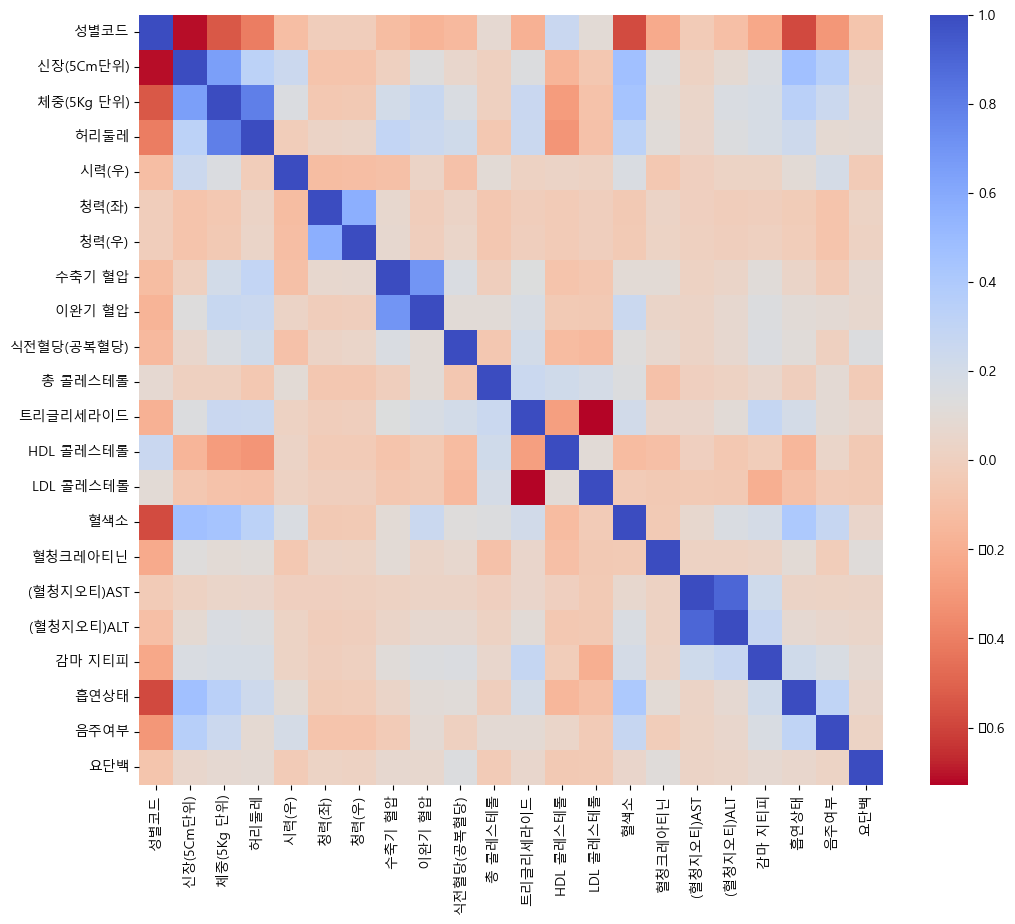

In [194]:
plt.figure(figsize=(12,10))
corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

In [195]:
corr['요단백'].sort_values()

성별코드         -0.079962
HDL 콜레스테롤    -0.047984
LDL 콜레스테롤    -0.045124
총 콜레스테롤      -0.038259
시력(우)        -0.036242
청력(우)         0.020156
음주여부          0.024780
청력(좌)         0.026734
(혈청지오티)AST    0.033277
(혈청지오티)ALT    0.045637
혈색소           0.054646
트리글리세라이드      0.055531
신장(5Cm단위)     0.058294
흡연상태          0.059681
이완기 혈압        0.063233
수축기 혈압        0.074901
체중(5Kg 단위)    0.075439
감마 지티피        0.081272
허리둘레          0.090151
혈청크레아티닌       0.122057
식전혈당(공복혈당)    0.148740
요단백           1.000000
Name: 요단백, dtype: float64

#### 차원축소 시각화

In [ ]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('요단백', axis=1)
y = new_df['요단백']


# T-SNE Implementation
X_reduced_tsne = TSNE(n_components=3, random_state=42).fit_transform(X.values)

# PCA Implementation
X_reduced_pca = PCA(n_components=3, random_state=42).fit_transform(X.values)

# TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=3, algorithm='randomized', random_state=42).fit_transform(X.values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


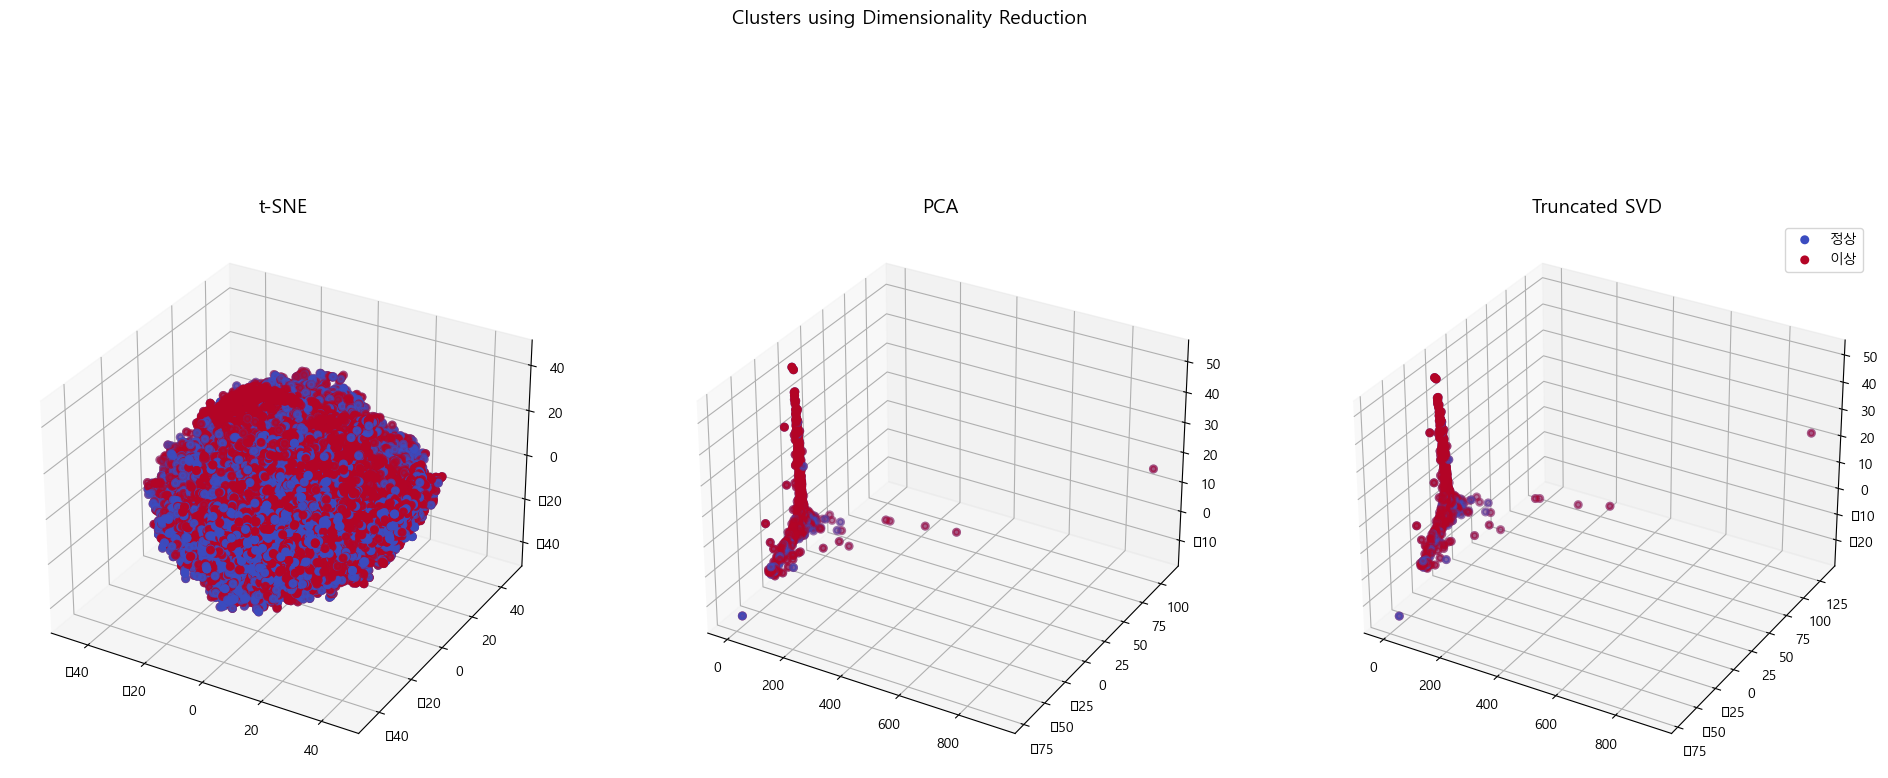

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
f = plt.figure(figsize=(24,10))
ax1 = f.add_subplot(131, projection='3d')
ax2 = f.add_subplot(132, projection='3d')
ax3 = f.add_subplot(133, projection='3d')
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)



# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], X_reduced_tsne[:,2], c=(y == 0), cmap='coolwarm', label='정상', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], X_reduced_tsne[:,2],c=(y == 1), cmap='coolwarm', label='이상', linewidths=2)
plt.legend()
ax1.set_title('t-SNE', fontsize=14)



# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], X_reduced_pca[:,2],c=(y == 0), cmap='coolwarm', label='정상', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], X_reduced_pca[:,2],c=(y == 1), cmap='coolwarm', label='이상', linewidths=2)
plt.legend()
ax2.set_title('PCA', fontsize=14)



# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], X_reduced_svd[:,2], c=(y == 0), cmap='coolwarm', label='정상', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], X_reduced_svd[:,2], c=(y == 1), cmap='coolwarm', label='이상', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
plt.legend()

plt.show()

### 데이터 오버샘플링(BorderlineSMOTE)

In [196]:
sm = BorderlineSMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

y_train_res.value_counts()

0.0    257762
1.0    257762
Name: 요단백, dtype: int64

In [197]:
tl = TomekLinks()
X_train_un, y_train_un = tl.fit_resample(X_train, y_train)

In [198]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

## 평가지표 계산기

In [93]:
def Evaluation_matrix(y_test, y_pred, type):
    y_test = y_test.values
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    for i in range(len(y_test)):
        if y_test[i] == 0:
            if y_pred[i] == 0:
                TN+=1
            else:
                FP+=1
        else:
            if y_pred[i] == 0:
                FN+=1
            else:
                TP+=1
    accuracy_score = (TP+TN)/(TP+FN+FP+TN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = (2*precision*recall)/(precision+recall)
    if type == 'accuracy_score':
        return accuracy_score
    elif type == 'f1_score':
        return f1_score

# 분류 모델(undersampling)


### RandomForest(Bagging)

- 교차검증 (Statified K-Fold)

In [216]:
new_df = distributed_df.sample(frac=1)
clf = LGBMClassifier(num_leaves= 100, learning_rate= 0.001, min_child_samples= 20, boosting_type='gbdt', objective='binary', colsample_bytree=1.0, max_depth=10)
clf.fit(new_df.drop(columns=['요단백']), new_df['요단백'])

y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

accuracy_score_train = Evaluation_matrix(y_train, y_pred_train, 'accuracy_score')
f1_score_train = Evaluation_matrix(y_train, y_pred_train, 'f1_score')
accuracy_score = Evaluation_matrix(y_test, y_pred, 'accuracy_score')
f1_score = Evaluation_matrix(y_test, y_pred, 'f1_score')

print('train set accuracy score: {}'.format(accuracy_score_train))
print('valid set accuracy score: {}'.format(accuracy_score))
print('train set f1 score: {}'.format(f1_score_train))
print('valid set f1 score: {}'.format(f1_score))


train set accuracy score: 0.711477256122118
valid set accuracy score: 0.7075734517542766
train set f1 score: 0.21516655679218208
valid set f1 score: 0.20601517341040462


In [37]:
str(type(y_test)).split()[1]

"'pandas.core.series.Series'>"

In [38]:
str(type(y_test)).split()[1] == "'pandas.core.series.Series'>"

True

In [ ]:
xgb= XGBClassifier()

xgb_param_grid={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9],
    
}

#score종류는 acc,f1,f1_micro,f1_macro등 원하는걸로 설정)
#여기서 설정 파라미터의 갯수(총 4000개의 조합이므로 4000번의 학습이 돌아감)
xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="f1", n_jobs=-1, verbose = 2)
xgb_grid.fit(new_df.drop(columns = ['요단백']), new_df['요단백'])

#best f1_macro 수치와 best parameter확인
print("best f1_macro : {0: .4f}".format(xgb_grid.best_score_))
print("best param : ",xgb_grid.best_params_)

#dataframe으로 랭킹순보기
result_df = pd.DataFrame(xgb_grid.cv_results_)
result_df.sort_values(by=['rank_test_score'],inplace=True)

#plot
result_df[['params','mean_test_score','rank_test_score']].head(10)

In [99]:
def cross_validation(X,y, model):
    skf = StratifiedKFold(n_splits=5, shuffle= True, random_state= 42)
    score = []


    for i, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
        X_train, y_train = X.iloc[train_idx,:], y.iloc[train_idx]
        X_valid, y_valid = X.iloc[valid_idx,:], y.iloc[valid_idx]

        print(i)
        scaler = RobustScaler()
        for col in X_train.columns:
            X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1,1))
            X_valid[col] = scaler.transform(X_valid[col].values.reshape(-1,1))

        if model == 'rf':
            clf1 = RandomForestClassifier(bootstrap= True, random_state=42, n_estimators = 100, min_samples_split=16, min_samples_leaf=8)
            clf1.fit(X_train, y_train)
            y_pred_train = clf1.predict(X_train)
            y_pred = clf1.predict(X_valid)

        elif model == 'xgb':
            clf1 = XGBClassifier(booster='gbtree', min_child_weight = 6, max_depth = 12)
            clf1.fit(X_train, y_train)
            y_pred_train = clf1.predict(X_train)
            y_pred = clf1.predict(X_valid)            

        accuracy_score_train = Evaluation_matrix(y_train, y_pred_train, 'accuracy_score')
        f1_score_train = Evaluation_matrix(y_train, y_pred_train, 'f1_score')
        accuracy_score = Evaluation_matrix(y_valid, y_pred, 'accuracy_score')
        f1_score = Evaluation_matrix(y_valid, y_pred, 'f1_score')

        print('train set accuracy score: {}'.format(accuracy_score_train))
        print('valid set accuracy score: {}'.format(accuracy_score))
        print('train set f1 score: {}'.format(f1_score_train))
        print('valid set f1 score: {}'.format(f1_score))

        score.append(f1_score)
        
    print('Cross Validation Score: {}'.format(np.mean(score)))

In [100]:
cross_validation(new_df.drop(columns = ['요단백']), new_df['요단백'], model = 'xgb')

0
train set accuracy score: 0.9619985329797438
valid set accuracy score: 0.5707515233581584
train set f1 score: 0.961106459157451
valid set f1 score: 0.5537306428906618
1
train set accuracy score: 0.961490718275687
valid set accuracy score: 0.5818099751749041
train set f1 score: 0.9605776173285198
valid set f1 score: 0.5686685288640595
2
train set accuracy score: 0.959544095243469
valid set accuracy score: 0.5733468742947416
train set f1 score: 0.9585620990579669
valid set f1 score: 0.5595806639487478
3
train set accuracy score: 0.966456963917962
valid set accuracy score: 0.5744272655456495
train set f1 score: 0.9657575670304984
valid set f1 score: 0.5626812014380146
4
train set accuracy score: 0.9680085761841623
valid set accuracy score: 0.5735244329082496
train set f1 score: 0.9673518742442563
valid set f1 score: 0.555568622838998
Cross Validation Score: 0.5600459319960963


In [61]:
new_df['요단백'].value_counts()

1.0    22154
0.0    22154
Name: 요단백, dtype: int64

### XGBoostClassifier(Boosting)

In [90]:
skf = StratifiedKFold(n_splits=5, shuffle= True, random_state= 42)
score = []


for i, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    X_train, y_train = X.iloc[train_idx,:], y.iloc[train_idx]
    X_valid, y_valid = X.iloc[valid_idx,:], y.iloc[valid_idx]

    print(i)
    scaler = RobustScaler()
    for col in X_train.columns:
        X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1,1))
        X_valid[col] = scaler.transform(X_valid[col].values.reshape(-1,1))

    clf1 = XGBClassifier(random_state=42)
    clf1.fit(X_train, y_train)
    y_pred_train = clf1.predict(X_train)
    y_pred = clf1.predict(X_valid)

    accuracy_score_train = Evaluation_matrix(y_train, y_pred_train, 'accuracy_score')
    f1_score_train = Evaluation_matrix(y_train, y_pred_train, 'f1_score')
    accuracy_score = Evaluation_matrix(y_valid, y_pred, 'accuracy_score')
    f1_score = Evaluation_matrix(y_valid, y_pred, 'f1_score')

    print('train set accuracy score: {}'.format(accuracy_score_train))
    print('valid set accuracy score: {}'.format(accuracy_score))
    print('train set f1 score: {}'.format(f1_score_train))
    print('valid set f1 score: {}'.format(f1_score))

    score.append(f1_score)
    
print('Cross Validation Score: {}'.format(np.mean(score)))

0
train set accuracy score: 0.9235620777832907
valid set accuracy score: 0.9205755505515056
train set f1 score: 0.10919604136550651
valid set f1 score: 0.07139669790272199
1
train set accuracy score: 0.9240423393509154
valid set accuracy score: 0.9200666641222345
train set f1 score: 0.11809453471196456
valid set f1 score: 0.06265851111442639
2
train set accuracy score: 0.9239819090874394
valid set accuracy score: 0.919812220907599
train set f1 score: 0.11585839529463988
valid set f1 score: 0.05742485419470615
3
train set accuracy score: 0.9240487004312813
valid set accuracy score: 0.9199648868363803
train set f1 score: 0.11803811493573645
valid set f1 score: 0.0600627521290901
4
train set accuracy score: 0.923946923145427
valid set accuracy score: 0.9200666641222345
train set f1 score: 0.11639937920331091
valid set f1 score: 0.056748236000600506
Cross Validation Score: 0.06165821026830902


# 분류 모델(oversampling)

In [106]:
y_train_res.value_counts()

0.0    252956
1.0    252956
Name: 요단백, dtype: int64

In [228]:
clf = XGBClassifier(learning_rate = 0.03,scale_pos_weight = 100)
clf.fit(X_train_res, y_train_res)

y_pred_train = clf.predict(X_train_res)
y_pred = clf.predict(X_test)

accuracy_score_train = Evaluation_matrix(y_train_res, y_pred_train, 'accuracy_score')
f1_score_train = Evaluation_matrix(y_train_res, y_pred_train, 'f1_score')
accuracy_score = Evaluation_matrix(y_test, y_pred, 'accuracy_score')
f1_score = Evaluation_matrix(y_test, y_pred, 'f1_score')

print('train set accuracy score: {}'.format(accuracy_score_train))
print('test set accuracy score: {}'.format(accuracy_score))
print('train set f1 score: {}'.format(f1_score_train))
print('test set f1 score: {}'.format(f1_score))

train set accuracy score: 0.5000077590955998
test set accuracy score: 0.08133955375928283
train set f1 score: 0.666670115171438
test set f1 score: 0.15040300252261118


In [106]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_un, y_train_un)

y_pred_train = clf.predict(X_train_un)
y_pred = clf.predict(X_test)

accuracy_score_train = Evaluation_matrix(y_train_un, y_pred_train, 'accuracy_score')
f1_score_train = Evaluation_matrix(y_train_un, y_pred_train, 'f1_score')
accuracy_score = Evaluation_matrix(y_test, y_pred, 'accuracy_score')
f1_score = Evaluation_matrix(y_test, y_pred, 'f1_score')

print('train set accuracy score: {}'.format(accuracy_score_train))
print('test set accuracy score: {}'.format(accuracy_score))
print('train set f1 score: {}'.format(f1_score_train))
print('test set f1 score: {}'.format(f1_score))

train set accuracy score: 0.9999554112200233
test set accuracy score: 0.9203935371697554
train set f1 score: 0.9997290951778942
test set f1 score: 0.05096056622851365


In [219]:
clf = RandomForestClassifier(n_estimators = 50, random_state=42)
clf.fit(X_train_res, y_train_res)

y_pred_train = clf.predict(X_train_res)
y_pred = clf.predict(X_test)

accuracy_score_train = Evaluation_matrix(y_train_res, y_pred_train, 'accuracy_score')
f1_score_train = Evaluation_matrix(y_train_res, y_pred_train, 'f1_score')
accuracy_score = Evaluation_matrix(y_test, y_pred, 'accuracy_score')
f1_score = Evaluation_matrix(y_test, y_pred, 'f1_score')

print('train set accuracy score: {}'.format(accuracy_score_train))
print('test set accuracy score: {}'.format(accuracy_score))
print('train set f1 score: {}'.format(f1_score_train))
print('test set f1 score: {}'.format(f1_score))

train set accuracy score: 0.999912710174502
test set accuracy score: 0.917936947500603
train set f1 score: 0.9999127025543233
test set f1 score: 0.03989102938314847


In [44]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

y_pred_train = clf.predict(X_train_res)
y_pred = clf.predict(X_test)

accuracy_score_train = Evaluation_matrix(y_train_res, y_pred_train, 'accuracy_score')
f1_score_train = Evaluation_matrix(y_train_res, y_pred_train, 'f1_score')
accuracy_score = Evaluation_matrix(y_test, y_pred, 'accuracy_score')
f1_score = Evaluation_matrix(y_test, y_pred, 'f1_score')

print('train set accuracy score: {}'.format(accuracy_score_train))
print('test set accuracy score: {}'.format(accuracy_score))
print('train set f1 score: {}'.format(f1_score_train))
print('test set f1 score: {}'.format(f1_score))

KeyboardInterrupt: 

In [34]:
def model_fit(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred = clf.predict(X_test)

    accuracy_score_train = Evaluation_matrix(y_train, y_pred_train, 'accuracy_score')
    f1_score_train = Evaluation_matrix(y_train, y_pred_train, 'f1_score')
    accuracy_score = Evaluation_matrix(y_test, y_pred, 'accuracy_score')
    f1_score = Evaluation_matrix(y_test, y_pred, 'f1_score')

    print('train set accuracy score: {}'.format(accuracy_score_train))
    print('test set accuracy score: {}'.format(accuracy_score))
    print('train set f1 score: {}'.format(f1_score_train))
    print('test set f1 score: {}'.format(f1_score))

In [109]:
xgb= XGBClassifier()

xgb_param_grid={
    'n_estimators' : [100],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2],
    'colsample_bytree' : [0.8],
    
}

#score종류는 acc,f1,f1_micro,f1_macro등 원하는걸로 설정)
xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="f1", n_jobs=-1, verbose = 2, cv=2)
xgb_grid.fit(X_train_res, y_train_res)

#best f1_macro 수치와 best parameter확인
print("best f1_macro : {0: .4f}".format(xgb_grid.best_score_))
print("best param : ",xgb_grid.best_params_)

#dataframe으로 랭킹순보기
result_df = pd.DataFrame(xgb_grid.cv_results_)
result_df.sort_values(by=['rank_test_score'],inplace=True)

#plot
result_df[['params','mean_test_score','rank_test_score']].head(10)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


In [36]:
X_train_under = new_df.drop(columns=['요단백'])
y_train_under = new_df['요단백']

In [96]:
model = RandomForestClassifier()
model_fit(model,X_train_un,y_train_un,X_test,y_test)

NameError: name 'model_fit' is not defined